# IE4483 - Dogs vs Cats

# Model 1: Self-made

## Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import os

In [ ]:
# Augmentation and normalization of dataset
train_generator = ImageDataGenerator(
    rescale = 1./255, # Normalization of pixels in image
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale=1./255)

train_iterator = train_generator.flow_from_directory("datasets/train",
                                                     target_size=(224,224),
                                                     batch_size=128,
                                                     class_mode="binary"
                                                     )

val_iterator = val_generator.flow_from_directory("datasets/val",
                                                 target_size=(224,224),
                                                 batch_size = 128,
                                                 class_mode="binary"
                                                 )

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Model Creation

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
# Creating the architecture network of the model
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPool2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Model's hyperparameters
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

## Training the model

In [ ]:
history = model.fit(train_iterator, epochs=50, validation_data=val_iterator)

Epoch 1/50
157/157 [==============================] - 76s 440ms/step - loss: 0.6657 - accuracy: 0.6122 - val_loss: 0.6065 - val_accuracy: 0.6626
Epoch 2/50
157/157 [==============================] - 75s 480ms/step - loss: 0.5651 - accuracy: 0.7073 - val_loss: 0.5295 - val_accuracy: 0.7298
Epoch 3/50
157/157 [==============================] - 70s 448ms/step - loss: 0.5046 - accuracy: 0.7515 - val_loss: 0.4590 - val_accuracy: 0.7810
Epoch 4/50
157/157 [==============================] - 74s 472ms/step - loss: 0.4799 - accuracy: 0.7686 - val_loss: 0.4442 - val_accuracy: 0.7890
Epoch 5/50
157/157 [==============================] - 69s 438ms/step - loss: 0.4594 - accuracy: 0.7821 - val_loss: 0.4317 - val_accuracy: 0.7938
Epoch 6/50
157/157 [==============================] - 69s 441ms/step - loss: 0.4381 - accuracy: 0.7945 - val_loss: 0.4037 - val_accuracy: 0.8138
Epoch 7/50
157/157 [==============================] - 69s 441ms/step - loss: 0.4218 - accuracy: 0.8069 - val_loss: 0.4105 - val_ac

In [ ]:
# Saving model
model.save("model_1.h5")

## Training Visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import re

In [ ]:
training_loss=[]
validation_loss=[]
training_accuracy=[]
validation_accuracy=[]
with open('cats_dogs_model/loss.txt') as f:
    lines = f.readlines()
    for line in lines:
        training_loss_search = re.search('loss: (.+?) -', line)
        validation_loss_search = re.search('val_loss: (.+?) -',line)
        training_accuracy_search = re.search('accuracy: (.+?) -', line)
        validation_accuracy_search = re.search('val_accuracy: (.*)', line)


        if training_loss_search:
            training_loss.append(float(training_loss_search.group(1)))
        if validation_loss_search:
            validation_loss.append(float(validation_loss_search.group(1)))
        if training_accuracy_search:
            training_accuracy.append(float(training_accuracy_search.group(1)))
        if validation_accuracy_search:
            validation_accuracy.append(float(validation_accuracy_search.group(1)))

epoch = list(range(1,51))

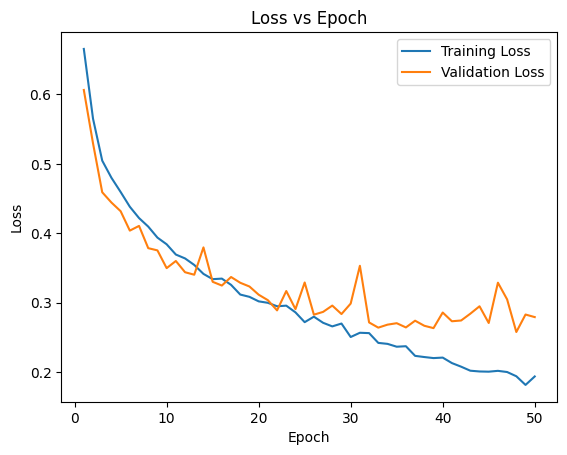

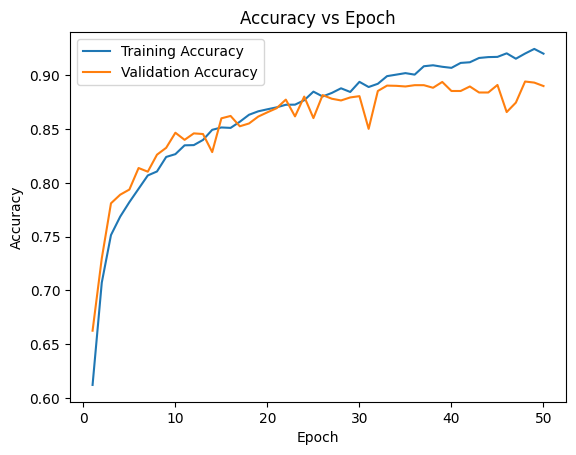

In [ ]:
epoch = list(range(1,51))

# Loss
plt.figure(1)
plt.plot(epoch, training_loss, label ='Training Loss')
plt.plot(epoch, validation_loss, label ='Validation Loss')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title('Loss vs Epoch')
plt.show()

# Accuracy
plt.figure(2)
plt.plot(epoch, training_accuracy, label ='Training Accuracy')
plt.plot(epoch, validation_accuracy, label ='Validation Accuracy')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Accuracy vs Epoch')
plt.show()

## Model Inference

In [ ]:
def predict_classes(image_path):
    # Load and decode the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)

    # Resize the image
    image = tf.image.resize(image, (128,128))

    # Normalize pixel values
    image = image / 255.0

    # Add a batch dimension
    image = tf.expand_dims(image, axis=0)

    # Perform inference
    predictions = model.predict(image)

    # Postprocess predictions (e.g., get the class label)
    threshold = 0.5  # Adjust as needed
    predicted_labels = (predictions >= threshold).astype(int)
    predicted_labels = predicted_labels[0][0]

    return predicted_labels


In [ ]:
model = tf.keras.models.load_model('model_1.h5')

# Calculate overall accuracy on dog and cat validation set
dog_count = 0
cat_count = 0

for image in os.listdir('datasets/val/dog'):
    predicted_class = predict_classes('datasets/val/dog/' + image)

    if predicted_class == 1:
        dog_count += 1

for image in os.listdir('datasets/val/cat'):
    predicted_class = predict_classes('datasets/val/cat/' + image)

    if predicted_class == 0:
        cat_count += 1

1/1 [==============================] - 0s 20ms/step


In [ ]:
print(f"Dog validation accuracy {dog_count/2500}")
print(f"Cat validation accuracy {cat_count/2500}\n")
print(f"Overall accuracy {(dog_count + cat_count)/5000}")

Dog validation accuracy 0.9244
Cat validation accuracy 0.8636

Overall accuracy 0.894


# Model 2: ResNet50

## Model Creation

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

In [ ]:
# Define the input shape (adjust based on your dataset)
input_shape = (128, 128, 3)

# Load the pre-trained ResNet50 model with weights from ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add your custom classification head
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification, so use sigmoid activation

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Adjust the learning rate of the optimizer
custom_learning_rate = 0.001  # You can set your desired learning rate
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=custom_learning_rate)

# Compile the model with the custom learning rate optimizer
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

## Model Training

In [ ]:
epochs = 10
batch_size = 32

# Train the model
history = model.fit(
    train_iterator,
    validation_data=val_iterator,
    epochs=epochs
)

Epoch 1/10
157/157 [==============================] - 219s 1s/step - loss: 0.7045 - accuracy: 0.5801 - val_loss: 0.6531 - val_accuracy: 0.6018
Epoch 2/10
157/157 [==============================] - 202s 1s/step - loss: 0.6330 - accuracy: 0.6399 - val_loss: 0.6010 - val_accuracy: 0.6842
Epoch 3/10
157/157 [==============================] - 200s 1s/step - loss: 0.6236 - accuracy: 0.6535 - val_loss: 0.6123 - val_accuracy: 0.6638
Epoch 4/10
157/157 [==============================] - 202s 1s/step - loss: 0.6165 - accuracy: 0.6607 - val_loss: 0.5854 - val_accuracy: 0.6986
Epoch 5/10
157/157 [==============================] - 202s 1s/step - loss: 0.6008 - accuracy: 0.6765 - val_loss: 0.5974 - val_accuracy: 0.6866
Epoch 6/10
157/157 [==============================] - 213s 1s/step - loss: 0.6043 - accuracy: 0.6715 - val_loss: 0.5973 - val_accuracy: 0.6828
Epoch 7/10
157/157 [==============================] - 197s 1s/step - loss: 0.5952 - accuracy: 0.6849 - val_loss: 0.5724 - val_accuracy: 0.7058

# Model 3: MobileNet

## Model Creation

In [ ]:
IMG_SHAPE = (224, 224, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
base_model.trainable = False

In [ ]:
global_avg_layer= tf.keras.layers.GlobalAveragePooling2D()
pred_layer=tf.keras.layers.Dense(1)

In [ ]:
model = tf.keras.Sequential([base_model, global_avg_layer, pred_layer])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
base_learn_rate = 0.0001

early_stopping = EarlyStopping(
    monitor='val_loss',   # Metric to monitor (e.g., validation loss)
    patience=5,          # Number of epochs with no improvement to wait before stopping
    restore_best_weights=True)  # Restore the best model weights when training stops

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learn_rate), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])


In [ ]:
history= model.fit(train_iterator, epochs=35, validation_data=val_iterator, callbacks=[early_stopping])

Epoch 1/35
157/157 [==============================] - 444s 3s/step - loss: 0.4333 - accuracy: 0.7883 - val_loss: 0.2312 - val_accuracy: 0.9292
Epoch 2/35
157/157 [==============================] - 438s 3s/step - loss: 0.2005 - accuracy: 0.9232 - val_loss: 0.1288 - val_accuracy: 0.9602
Epoch 3/35
157/157 [==============================] - 425s 3s/step - loss: 0.1458 - accuracy: 0.9416 - val_loss: 0.0998 - val_accuracy: 0.9670
Epoch 4/35
157/157 [==============================] - 437s 3s/step - loss: 0.1230 - accuracy: 0.9510 - val_loss: 0.0853 - val_accuracy: 0.9714
Epoch 5/35
157/157 [==============================] - 450s 3s/step - loss: 0.1146 - accuracy: 0.9527 - val_loss: 0.0806 - val_accuracy: 0.9734
Epoch 6/35
157/157 [==============================] - 441s 3s/step - loss: 0.1049 - accuracy: 0.9563 - val_loss: 0.0721 - val_accuracy: 0.9740
Epoch 7/35
157/157 [==============================] - 431s 3s/step - loss: 0.0983 - accuracy: 0.9602 - val_loss: 0.0691 - val_accuracy: 0.9754

In [ ]:
model.save("model_3.h5")

## Training Visualization

In [ ]:
import matplotlib.pyplot as plt

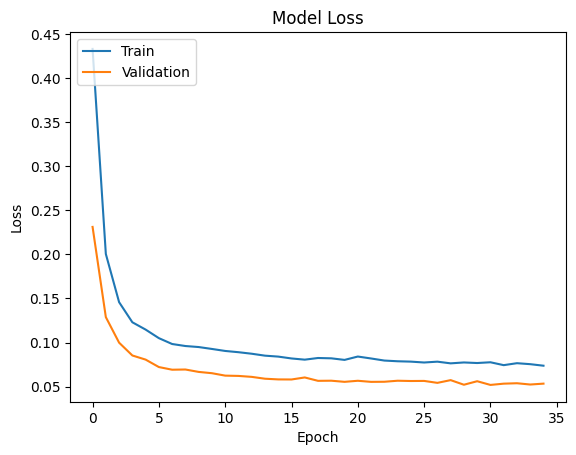

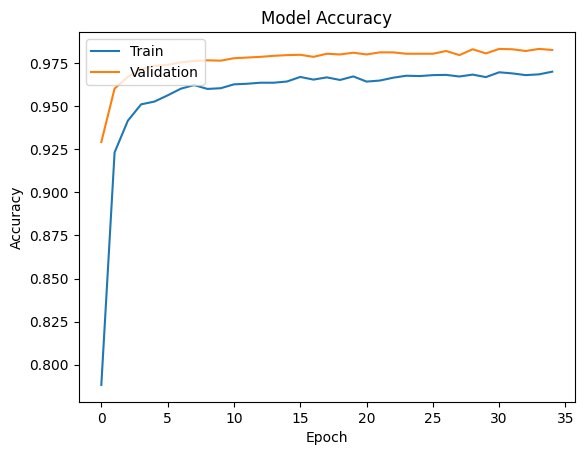

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# IE4483 - CIFAR

## Model Creation

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPool2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
(X_train, y_train), (X_val, y_val) = datasets.cifar10.load_data()

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    channel_shift_range=50,
    horizontal_flip=True)

validationgen = ImageDataGenerator(
    rescale=1./255)

In [ ]:
datagen.fit(X_train)
validationgen.fit(X_val)

In [ ]:
input = Input(shape=(32, 32, 3))
X = Conv2D(64, (1, 1))(input)
X = BatchNormalization()(X)
X = Activation("relu")(X)
X = Conv2D(64, (3, 3))(X)
X = BatchNormalization()(X)
X = Activation("relu")(X)
X = Conv2D(64, (5, 5))(X)
X = BatchNormalization()(X)
X = Activation("relu")(X)
X = Dropout(0.25)(X)
X = MaxPool2D((2,2))(X)

X = Conv2D(128, (1, 1))(X)
X = BatchNormalization()(X)
X = Activation("relu")(X)
X = Conv2D(128, (3, 3))(X)
X = BatchNormalization()(X)
X = Activation("relu")(X)
X = Conv2D(128, (5, 5))(X)
X = BatchNormalization()(X)
X = Activation("relu")(X)
X = Dropout(0.25)(X)
X = Conv2D(256, (1, 1))(X)
X = BatchNormalization()(X)
X = Activation("relu")(X)
X = Conv2D(256, (3, 3))(X)
X = BatchNormalization()(X)
X = Activation("relu")(X)
X = Conv2D(256, (5, 5))(X)
X = BatchNormalization()(X)
X = Activation("relu")(X)
X = Dropout(0.25)(X)
X = Flatten()(X)
output = Dense(10, activation="softmax")(X)

In [ ]:
model = Model(input, output)

In [ ]:
model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        256       
                                                                 
 batch_normalization_17 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 activation_9 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 batch_normalization_18 (Bat  (None, 30, 30, 64)       256       
 chNormalization)                                          

In [ ]:
# Define a ModelCheckpoint callback
checkpoint_path = 'model_weights_epoch_{epoch:02d}.h5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      save_weights_only=True,
                                      period=10)

In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                    steps_per_epoch=len(X_train) / 128, validation_data=validationgen.flow(X_val, y_val), epochs=500, callbacks=[checkpoint_callback])

Epoch 1/500
390/390 [==============================] - 45s 109ms/step - loss: 1.7925 - accuracy: 0.3420 - val_loss: 2.0478 - val_accuracy: 0.2777
Epoch 2/500
390/390 [==============================] - 42s 108ms/step - loss: 1.4269 - accuracy: 0.4840 - val_loss: 1.3751 - val_accuracy: 0.5133
Epoch 3/500
390/390 [==============================] - 42s 107ms/step - loss: 1.2313 - accuracy: 0.5610 - val_loss: 1.1752 - val_accuracy: 0.5818
Epoch 4/500
390/390 [==============================] - 43s 111ms/step - loss: 1.0968 - accuracy: 0.6129 - val_loss: 1.1440 - val_accuracy: 0.6072
Epoch 5/500
390/390 [==============================] - 41s 106ms/step - loss: 1.0105 - accuracy: 0.6463 - val_loss: 0.9744 - val_accuracy: 0.6559
Epoch 6/500
390/390 [==============================] - 43s 110ms/step - loss: 0.9379 - accuracy: 0.6746 - val_loss: 1.2759 - val_accuracy: 0.5946
Epoch 7/500
390/390 [==============================] - 42s 107ms/step - loss: 0.8845 - accuracy: 0.6919 - val_loss: 0.8612 -

## Training Visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import re

In [ ]:
training_loss=[]
validation_loss=[]
training_accuracy=[]
validation_accuracy=[]
with open('cifar_model/loss.txt') as f:
    lines = f.readlines()
    for line in lines:
        training_loss_search = re.search('loss: (.+?) -', line)
        validation_loss_search = re.search('val_loss: (.+?) -',line)
        training_accuracy_search = re.search('accuracy: (.+?) -', line)
        validation_accuracy_search = re.search('val_accuracy: (.*)', line)


        if training_loss_search:
            training_loss.append(float(training_loss_search.group(1)))
        if validation_loss_search:
            validation_loss.append(float(validation_loss_search.group(1)))
        if training_accuracy_search:
            training_accuracy.append(float(training_accuracy_search.group(1)))
        if validation_accuracy_search:
            validation_accuracy.append(float(validation_accuracy_search.group(1)))

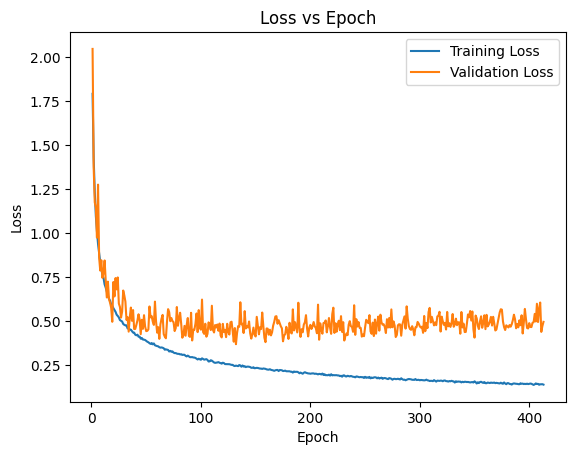

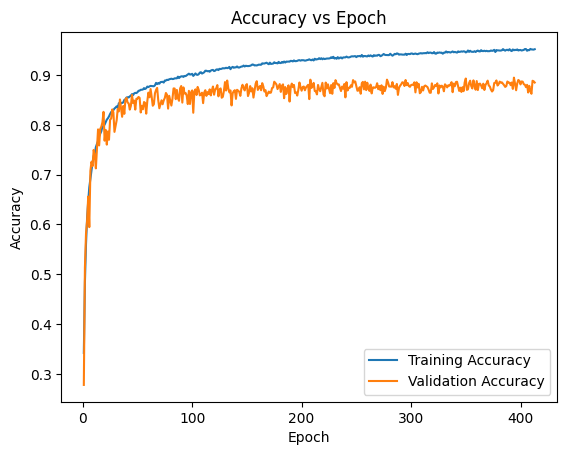

In [ ]:
epoch = list(range(1,414))

# Loss
plt.figure(1)
plt.plot(epoch, training_loss, label ='Training Loss')
plt.plot(epoch, validation_loss, label ='Validation Loss')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title('Loss vs Epoch')
plt.show()

# Accuracy
plt.figure(2)
plt.plot(epoch, training_accuracy, label ='Training Accuracy')
plt.plot(epoch, validation_accuracy, label ='Validation Accuracy')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Accuracy vs Epoch')
plt.show()